In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift

%matplotlib inline

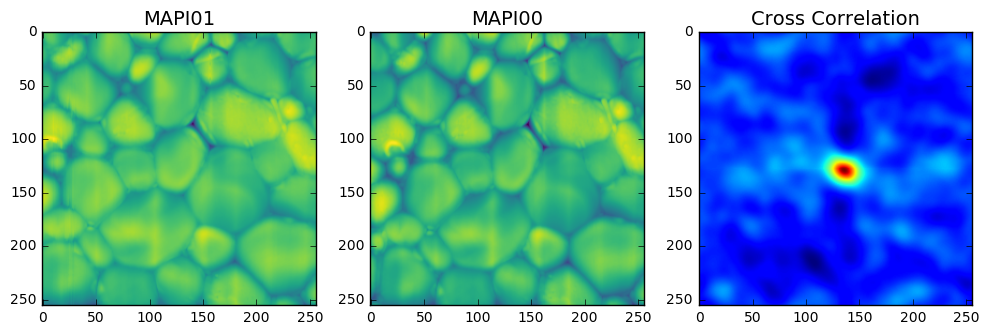

Detected pixel offset (y, x): [-1. -7.]


In [21]:
MAPI01Path='./data/MAPI_01.txt'
MAPI00Path='./data/MAPI_00.txt'
#load in txt files corresponding to height
MAPI01Height=np.loadtxt(MAPI_01Path, delimiter="\t", dtype='float')
MAPI00Height=np.loadtxt(MAPI_00Path, delimiter="\t", dtype='float')
ImageProduct=np.fft.fft2(MAPI00Height)*np.fft.fft2(MAPI01Height).conj()
CrossCorrelation=np.fft.fftshift(np.fft.ifft2(ImageProduct))


fig=plt.figure(figsize=(12,10))

MAPI01_plt=fig.add_subplot(131)
MAPI00_plt=fig.add_subplot(132)
CrossCorrelation_plt=fig.add_subplot(133)

MAPI01_plt.set_title('MAPI01', fontsize=14)
MAPI00_plt.set_title('MAPI00', fontsize=14)
#what does this cross correlation show? what does the dark spot correspond to? 
CrossCorrelation_plt.set_title('Cross Correlation', fontsize=14)

MAPI01_plt.imshow(MAPI01Height,cmap='viridis')
MAPI00_plt.imshow(MAPI00Height,cmap='viridis')
CrossCorrelation_plt.imshow(CrossCorrelation.real)
plt.show()

print("Detected pixel offset (y, x): {}".format(shift))

#5x5 um images of roughly the same area

In [14]:
#01 is offset from 00 
shift,error,diffphase=register_translation(MAPI00Height, MAPI01Height)
#what about rotations? 

#what is the difference between the pixel precision and subpixel precision and why would you use one over the other? 
#how do you practically shift one image over and crop both to a common area so they are the same dimension? 